In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

import folium as f



/Users/siddharthtayi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
pd.set_option('display.max_columns', None)

# Jan - Host Table

In [3]:
data = pd.read_csv('host_jan-22.csv')
data.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,speed,yawrate,longaccel,transstate,gpsUncertaintyArea,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,brakestatus,throttlepospct,steerangle,turnsignal,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,timestamp_hr,updateTimeMs_hr
0,1640995200040181110014,6f813aebcbec975f467a1097ea94b802,2022-01-01,10014,1640995200040,20220101,234454,1678858665000,1811,7b9d31aa17b849b238ab79cef0733041,1001420220101234454,86400040,27.975867,-82.277571,-6.099000,270.24347,0.726,2.0,0.91,0.47,152.0,0.726,-0.000018,0.419822,2.0,1.343659,1.624016,1.624016,-20.009843,2.985564,1.541995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,2022-01-01 00:00:25.600,1970-01-20 10:20:58.665
1,1640995200055378610071,8ee8b375371d2fd0a4605848e4636989,2022-01-01,10071,1640995200055,20220101,232855,1678858665000,3786,4910fcdaedc2be5c5f05533b7a9cb8c2,1007120220101232855,86400055,27.917010,-82.285677,-14.942000,359.93253,18.858,2.0,0.57,0.48,4.3,18.858,0.241233,-0.073326,2.0,0.859540,42.184145,42.184145,-49.022310,1.870079,1.574803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,2022-01-01 00:00:25.600,1970-01-20 10:20:58.665
2,1640995200540181210014,6f813aebcbec975f467a1097ea94b802,2022-01-01,10014,1640995200540,20220101,234454,1678858665000,1812,7b9d31aa17b849b238ab79cef0733041,1001420220101234454,86400540,27.975867,-82.277575,-6.135000,270.24347,1.042,2.0,0.90,0.47,151.0,1.042,-0.000003,0.515054,2.0,1.328894,2.330888,2.330888,-20.127952,2.952756,1.541995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,2022-01-01 00:00:25.600,1970-01-20 10:20:58.665
3,1640995200555378710071,8ee8b375371d2fd0a4605848e4636989,2022-01-01,10071,1640995200555,20220101,232855,1678858665000,3787,4910fcdaedc2be5c5f05533b7a9cb8c2,1007120220101232855,86400555,27.917095,-82.285677,-14.835999,359.83844,18.845,2.0,0.57,0.48,4.5,18.845,0.021451,-0.058381,2.0,0.859540,42.155064,42.155064,-48.674539,1.870079,1.574803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,2022-01-01 00:00:25.600,1970-01-20 10:20:58.665
4,1640995201040181310014,6f813aebcbec975f467a1097ea94b802,2022-01-01,10014,1640995201040,20220101,234454,1678858665000,1813,7b9d31aa17b849b238ab79cef0733041,1001420220101234454,86401040,27.975865,-82.277582,-6.194000,262.26047,1.869,2.0,0.89,0.47,151.0,1.869,-10.275696,1.414231,2.0,1.314128,4.180834,4.180834,-20.321522,2.919948,1.541995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,False,2022-01-01 00:00:25.600,1970-01-20 10:20:58.665


In [4]:
data['timestamp_hr'] = pd.to_datetime(data['timestamp_hr'])

# Filter the DataFrame to include only rows where the date is '2022-03-01'
filtered_df = data[data['timestamp_hr'].dt.date == pd.to_datetime('2022-01-07').date()]

# Display the filtered DataFrame
filtered_df.shape

(417323, 44)

In [5]:
len(filtered_df['device'].unique())

56

In [6]:
filtered_df.isna().sum()

uuid                          0
segmentid                     0
partitionDate                 0
device                        0
timestamp                     0
filedate                      0
filetimeutc                   0
updateTimeMs                  0
sequenceNo                    0
vin                           0
tripId                        0
localTimeMs                   0
latitude                  13613
longitude                 13613
elevation                     0
heading                   10392
gpsspeed                  10392
fixtypehvgps              10392
gpssemimajaxis            10392
gpssemiminaxis            10392
gpsorientsemimaj             41
speed                     11294
yawrate                   11294
longaccel                 11294
transstate                11294
gpsUncertaintyArea            0
speedMph                      0
gpsspeedMph                   0
elevationFt                   0
gpssemimajaxisFt              0
gpssemiminaxisFt              0
brakesta

In [7]:
# Removing NAs from lat and long to plot. (these can be filled using ffill or other imputating methods)

x = filtered_df[filtered_df['latitude'].notna() & filtered_df['longitude'].notna()]
x.tail()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,speed,yawrate,longaccel,transstate,gpsUncertaintyArea,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,brakestatus,throttlepospct,steerangle,turnsignal,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,timestamp_hr,updateTimeMs_hr
2307563,1641600055017533010411,14d6d24e2adfab8ead6b2254ae4503e0,2022-01-08,10411,1641600055017,20220108,231629,1678858665000,5330,2d5b53f80151aea5fef0722f8b1edf99,1041120220108231629,86455017,27.727903,-82.435990,-27.721,270.00623,20.403,2.0,4.6,2.1,157.0,20.403,-0.422897,0.610795,2.0,30.347785,45.640211,45.640211,-90.948163,15.091864,6.889764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 23:59:51.808,1970-01-20 10:20:58.665
2307564,1641600055517533110411,14d6d24e2adfab8ead6b2254ae4503e0,2022-01-08,10411,1641600055517,20220108,231629,1678858665000,5331,2d5b53f80151aea5fef0722f8b1edf99,1041120220108231629,86455517,27.727904,-82.436094,-27.653,270.64288,20.594,2.0,4.6,2.1,157.0,20.594,0.985218,0.378471,2.0,30.347785,46.067466,46.067466,-90.725066,15.091864,6.889764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 23:59:51.808,1970-01-20 10:20:58.665
2307565,1641600056017533210411,14d6d24e2adfab8ead6b2254ae4503e0,2022-01-08,10411,1641600056017,20220108,231629,1678858665000,5332,2d5b53f80151aea5fef0722f8b1edf99,1041120220108231629,86456017,27.727906,-82.436200,-27.675,271.18848,20.959,2.0,4.7,2.1,157.0,20.959,1.049853,0.660954,2.0,31.007519,46.883948,46.883948,-90.797244,15.419948,6.889764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 23:59:51.808,1970-01-20 10:20:58.665
2307566,1641600056517533310411,14d6d24e2adfab8ead6b2254ae4503e0,2022-01-08,10411,1641600056517,20220108,231629,1678858665000,5333,2d5b53f80151aea5fef0722f8b1edf99,1041120220108231629,86456517,27.727907,-82.436307,-27.650,270.72635,21.165,2.0,4.8,2.0,156.0,21.165,-0.229037,0.465602,2.0,30.159289,47.344757,47.344757,-90.715223,15.748032,6.561680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 23:59:51.808,1970-01-20 10:20:58.665
2307567,1641600057017533410411,14d6d24e2adfab8ead6b2254ae4503e0,2022-01-08,10411,1641600057017,20220108,231629,1678858665000,5334,2d5b53f80151aea5fef0722f8b1edf99,1041120220108231629,86457017,27.727907,-82.436415,-27.626,270.52527,21.417,2.0,4.9,2.1,156.0,21.417,-0.372757,0.496802,2.0,32.326988,47.908465,47.908465,-90.636483,16.076116,6.889764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 23:59:51.808,1970-01-20 10:20:58.665


In [8]:
x['tripId'].unique()

array([1001020220106225521, 1042620220106235759,  302020220107192510,
        305220220107194642,   30402022010783319, 1002920220107233510,
          1002820220107148,    1041320220107236,    1041420220107916,
          1004920220107839,   10414202201071313,   10426202201072055,
         10426202201072336,   10010202201072341,   10422202201073035,
         10020202201073109,   10049202201073928,   30402022010710307,
        104202022010711815,   30402022010712009,  104202022010712332,
           942022010712434,  100322022010713253,  104142022010723652,
         30022022010723825,  104222022010730830,  104222022010732711,
        100202022010732906,  104202022010735125,  104202022010741503,
         30402022010751641,   30202022010764311,   30522022010764539,
         30402022010783739,  104202022010793621,  104112022010794541,
       1042420220107102612,  300920220107103420, 1005920220107110046,
       1005920220107112259, 1005920220107114918, 1042720220107115311,
          9720220107

In [9]:
# Trip Id: '1042220220101123930', 1005920220107112259, 100202022010732906, 104202022010793621

dm = x[x['tripId'] ==  104202022010793621]
dm.head()

,uuid,segmentid,partitionDate,device,timestamp,filedate,filetimeutc,updateTimeMs,sequenceNo,vin,tripId,localTimeMs,latitude,longitude,elevation,heading,gpsspeed,fixtypehvgps,gpssemimajaxis,gpssemiminaxis,gpsorientsemimaj,speed,yawrate,longaccel,transstate,gpsUncertaintyArea,speedMph,gpsspeedMph,elevationFt,gpssemimajaxisFt,gpssemiminaxisFt,brakestatus,throttlepospct,steerangle,turnsignal,headlamp,wiper,stabilitycontrolstatus,absstatus,traccontrolstatus,closestintersectid,gpsUncertainFlag,timestamp_hr,updateTimeMs_hr
1933049,16415481900722010420,5dc9a730f99264e9bcfe0093989ab7da,2022-01-07,10420,1641548190072,20220107,93621,1678858665000,20,ca751e6ab38280edada823df9cb45a93,104202022010793621,120990072,27.725277,-82.390074,-14.466,266.481,0.194,1.0,134.0,123.0,98.0,0.000,0.0,0.000000,2.0,51779.730116,0.000000,0.433966,-47.460630,439.632547,403.543308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 09:36:58.368,1970-01-20 10:20:58.665
1933051,16415481905722110420,5dc9a730f99264e9bcfe0093989ab7da,2022-01-07,10420,1641548190572,20220107,93621,1678858665000,21,ca751e6ab38280edada823df9cb45a93,104202022010793621,120990572,27.726720,-82.388267,-11.952,266.481,0.283,1.0,6.7,5.4,118.0,0.283,0.0,0.790428,2.0,113.662822,0.633053,0.633053,-39.212598,21.981627,17.716535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 09:36:58.368,1970-01-20 10:20:58.665
1933053,16415481910722210420,5dc9a730f99264e9bcfe0093989ab7da,2022-01-07,10420,1641548191072,20220107,93621,1678858665000,22,ca751e6ab38280edada823df9cb45a93,104202022010793621,120991072,27.726719,-82.388266,-12.008,266.481,0.655,1.0,4.7,3.8,111.0,0.655,0.0,0.641517,2.0,56.108845,1.465193,1.465193,-39.396326,15.419948,12.467192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 09:36:58.368,1970-01-20 10:20:58.665
1933054,16415481915722310420,5dc9a730f99264e9bcfe0093989ab7da,2022-01-07,10420,1641548191572,20220107,93621,1678858665000,23,ca751e6ab38280edada823df9cb45a93,104202022010793621,120991572,27.726717,-82.388264,-12.216,266.481,0.674,1.0,3.9,3.2,107.0,0.674,0.0,0.358069,2.0,39.207076,1.507695,1.507695,-40.078740,12.795276,10.498688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 09:36:58.368,1970-01-20 10:20:58.665
1933055,16415481920722410420,5dc9a730f99264e9bcfe0093989ab7da,2022-01-07,10420,1641548192072,20220107,93621,1678858665000,24,ca751e6ab38280edada823df9cb45a93,104202022010793621,120992072,27.726716,-82.388264,-12.400,266.481,0.522,1.0,3.3,2.7,105.0,0.522,0.0,0.017711,2.0,27.991591,1.167681,1.167681,-40.682415,10.826772,8.858268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,True,2022-01-07 09:36:58.368,1970-01-20 10:20:58.665


In [10]:
dm.shape

(2828, 44)

In [11]:
dm.isna().sum()

uuid                      0
segmentid                 0
partitionDate             0
device                    0
timestamp                 0
filedate                  0
filetimeutc               0
updateTimeMs              0
sequenceNo                0
vin                       0
tripId                    0
localTimeMs               0
latitude                  0
longitude                 0
elevation                 0
heading                   0
gpsspeed                  0
fixtypehvgps              0
gpssemimajaxis            0
gpssemiminaxis            0
gpsorientsemimaj          0
speed                     0
yawrate                   0
longaccel                 0
transstate                0
gpsUncertaintyArea        0
speedMph                  0
gpsspeedMph               0
elevationFt               0
gpssemimajaxisFt          0
gpssemiminaxisFt          0
brakestatus               0
throttlepospct            0
steerangle                0
turnsignal                0
headlamp            

<Axes: xlabel='longitude', ylabel='latitude'>

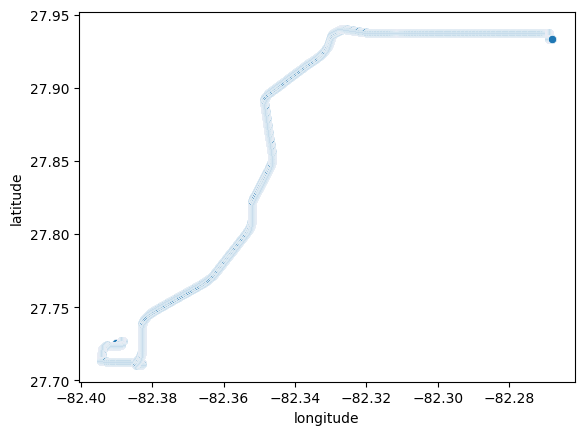

In [12]:
sns.scatterplot(data = dm, y = 'latitude', x = 'longitude')

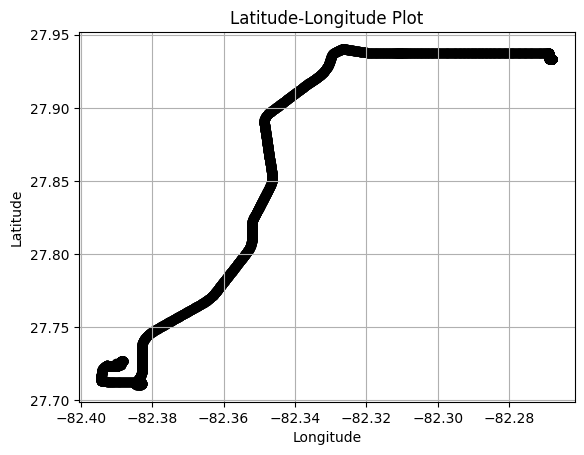

In [13]:
latitudes_list = dm['latitude']
longitudes_list = dm['longitude']

plt.scatter(longitudes_list, latitudes_list, color = 'black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Plot')
plt.grid(True)
plt.show()

In [14]:
# Create a map centered around a specific location
# 27.975867	-82.277571	
map = f.Map(location=[27.949972, -82.454201], zoom_start=10)

# Lat and Log for one trip passed as a list  
locations = zip(latitudes_list, longitudes_list)

# Add markers for each latitude-longitude pair
for lat, lon in locations:
    f.Marker([lat, lon]).add_to(map)

# Display the map
map


<Axes: xlabel='timestamp', ylabel='speedMph'>

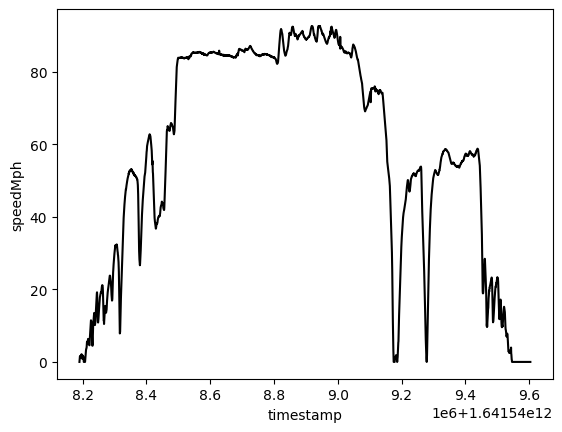

In [15]:
sns.lineplot(data = dm, x = 'timestamp', y = 'speedMph', color = 'black')


/var/folders/_m/k7x7jjp16692_c4b1lv67d1h0000gn/T/ipykernel_62153/904603780.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=dm, x='speed', y='yawrate', palette=cu_colors, linewidth=2)


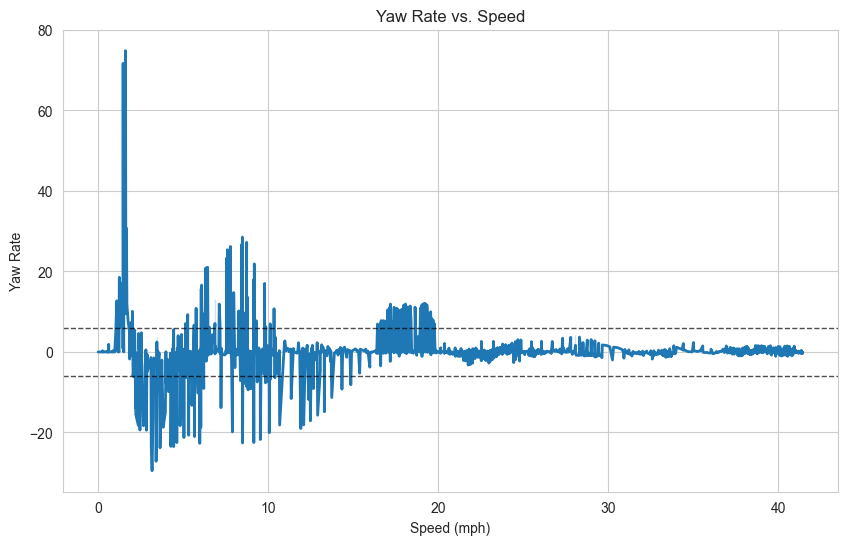

In [16]:
cu_colors = ["gray", "black"]

sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=dm, x='speed', y='yawrate', palette=cu_colors, linewidth=2)


plt.xlabel('Speed (mph)')
plt.ylabel('Yaw Rate')
plt.title('Yaw Rate vs. Speed')


plt.axhline(y=6, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-6, color='black', linestyle='--', linewidth=1, alpha=0.7)


plt.show()

/var/folders/_m/k7x7jjp16692_c4b1lv67d1h0000gn/T/ipykernel_62153/1427921230.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=dm, x='timestamp', y='yawrate', palette=cu_colors, linewidth=2)


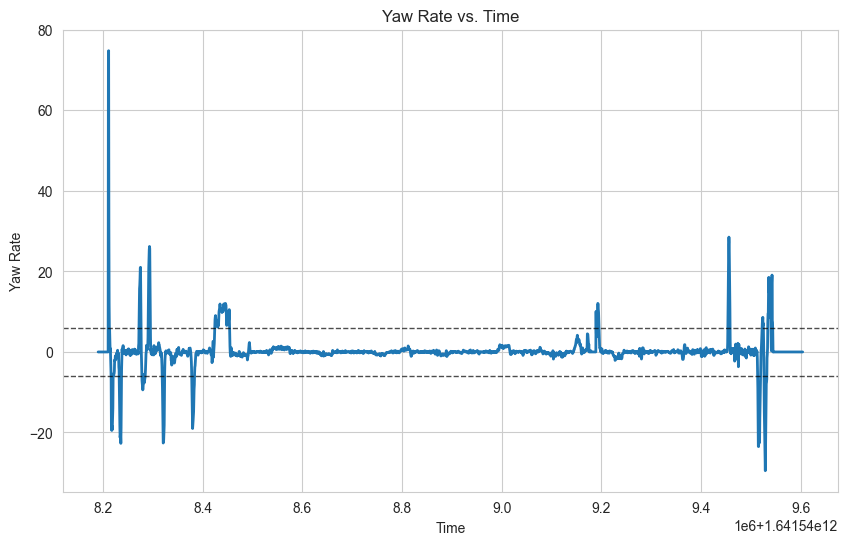

In [17]:
cu_colors = ["gray", "black"]

sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=dm, x='timestamp', y='yawrate', palette=cu_colors, linewidth=2)


plt.xlabel('Time')
plt.ylabel('Yaw Rate')
plt.title('Yaw Rate vs. Time')

# plt.legend(title='Brake Status', fontsize=12, title_fontsize='13', edgecolor='black')
plt.axhline(y=6, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-6, color='black', linestyle='--', linewidth=1, alpha=0.7)

In [18]:
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure()

# Add line trace for yawrate
fig.add_trace(go.Scatter(x=dm['timestamp'], y=dm['yawrate'], mode='lines', line=dict(color='gray', width=2), name='Brake Status'))

# Add vertical lines at y=6 and y=-6
fig.add_shape(type='line', x0=dm['timestamp'].iloc[0], y0=6, x1=dm['timestamp'].iloc[-1], y1=6, line=dict(color='black', width=1, dash='dash'), opacity=0.7)
fig.add_shape(type='line', x0=dm['timestamp'].iloc[0], y0=-6, x1=dm['timestamp'].iloc[-1], y1=-6, line=dict(color='black', width=1, dash='dash'), opacity=0.7)

# Update layout
fig.update_layout(title='Yaw Rate vs. Time', xaxis_title='Time', yaxis_title='Yaw Rate', legend=dict(title='Brake Status', font=dict(size=12)), 
                  plot_bgcolor='white', xaxis=dict(showgrid=True, gridcolor='lightgray'), yaxis=dict(showgrid=True, gridcolor='lightgray'))

# Show plot
fig.show()

<code>

Ideas for Honda

Lane change:
1. How frequently are the lanes changed and at what speed considering the yaw rate. 
2. How many times did the driver change the lanes at once at what speed? Ans: (Highway data needed. Most of the trips are within the city making it difficult to interpret.)
3. Did the driver overtake? (Hypothesis) 
4. Automate the whole process and generate a report that gives you whatever I’ve done so far. 

In [19]:
dm['timestamp_hr'].iloc[-1] - dm['timestamp_hr'].iloc[0]

Timedelta('0 days 00:24:01.792000')

In [20]:
new_df = dm[['timestamp', 'yawrate', 'timestamp_hr', 'speed', 'brakestatus', 'turnsignal']]
new_df.head()

,timestamp,yawrate,timestamp_hr,speed,brakestatus,turnsignal
1933049,1641548190072,0.0,2022-01-07 09:36:58.368,0.000,0.0,0.0
1933051,1641548190572,0.0,2022-01-07 09:36:58.368,0.283,0.0,0.0
1933053,1641548191072,0.0,2022-01-07 09:36:58.368,0.655,0.0,0.0
1933054,1641548191572,0.0,2022-01-07 09:36:58.368,0.674,0.0,0.0
1933055,1641548192072,0.0,2022-01-07 09:36:58.368,0.522,0.0,0.0


In [21]:
new_df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,2828.0,1641548897038.592285,1641548190072.0,1641548543537.0,1641548897012.0,1641549250587.0,1641549603962.0,408368.628444
yawrate,2828.0,0.15769,-29.497879,-0.253969,0.0,0.22195,74.81628,4.290898
timestamp_hr,2828,2022-01-07 09:48:16.160407296,2022-01-07 09:36:58.368000,2022-01-07 09:41:20.512000,2022-01-07 09:47:53.728000,2022-01-07 09:54:26.944000,2022-01-07 10:01:00.160000,NaN
speed,2828.0,25.777936,0.0,16.05375,26.2815,38.03,41.444,13.487302
brakestatus,2828.0,0.087694,0.0,0.0,0.0,0.0,1.0,0.2829
turnsignal,2828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
-29.497879 < -6

True

In [23]:
# Yawrate threshold = +-6
## Filtering out values above and below the threshold

x = new_df[(new_df['yawrate'] >= 6) | (new_df['yawrate'] < -6.0)]
x.head()

,timestamp,yawrate,timestamp_hr,speed,brakestatus,turnsignal
1933092,1641548210662,71.669780,2022-01-07 09:36:58.368,1.470,0.0,0.0
1933093,1641548211162,74.816280,2022-01-07 09:36:58.368,1.610,0.0,0.0
1933094,1641548211662,30.718280,2022-01-07 09:36:58.368,1.666,0.0,0.0
1933095,1641548212162,11.789436,2022-01-07 09:36:58.368,1.695,0.0,0.0
1933103,1641548216162,-6.285581,2022-01-07 09:36:58.368,2.499,0.0,0.0


In [24]:
x.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,196.0,1641548719449.244873,1641548210662.0,1641548294037.0,1641548436912.0,1641549456587.0,1641549543462.0,533796.668953
yawrate,196.0,2.455956,-29.497879,-9.943056,7.749749,11.074802,74.81628,15.84857
timestamp_hr,196,2022-01-07 09:45:23.262693888,2022-01-07 09:36:58.368000,2022-01-07 09:39:09.440000,2022-01-07 09:41:20.512000,2022-01-07 09:56:38.016000,2022-01-07 09:58:49.088000,NaN
speed,196.0,9.831719,1.095,4.4475,8.4905,17.07775,19.774,6.275989
brakestatus,196.0,0.040816,0.0,0.0,0.0,0.0,1.0,0.198371
turnsignal,196.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/_m/k7x7jjp16692_c4b1lv67d1h0000gn/T/ipykernel_62153/2076105189.py:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



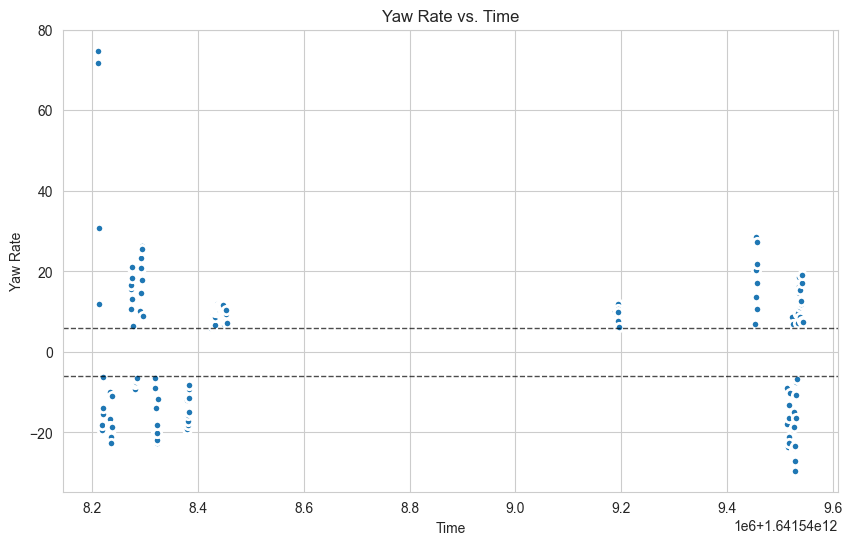

In [25]:
cu_colors = ["gray", "black"]

sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=x, x='timestamp', y='yawrate', palette=cu_colors, linewidth=2)


plt.xlabel('Time')
plt.ylabel('Yaw Rate')
plt.title('Yaw Rate vs. Time')

plt.axhline(y=6, color='black', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(y=-6, color='black', linestyle='--', linewidth=1, alpha=0.7)


<code>

## OVERTAKING - Hypo

In [26]:
from scipy.signal import find_peaks

yawrate = new_df['yawrate']

# Find peaks (both positive and negative spikes)
peaks_pos, _ = find_peaks(yawrate, height=6)  # Find peaks greater than 6
peaks_neg, _ = find_peaks(-yawrate, height=6)  # Find troughs greater than 6 (negative spikes)

# Merge peaks and troughs
peaks = sorted(list(peaks_pos) + list(peaks_neg))

# Calculate rise and fall for each peak
rise_fall = [yawrate.iloc[peak] - yawrate.iloc[peak-1] if peak > 0 else None for peak in peaks]

# Number of peaks
num_peaks = len(peaks)

# Calculate time difference between peaks/troughs
time_diff = [new_df['timestamp_hr'].iloc[peaks[i]] - new_df['timestamp_hr'].iloc[peaks[i-1]] for i in range(1, len(peaks))]

# Output results
print("Total number of peaks:", num_peaks)
print("Rise and fall for each peak:", rise_fall)
print("Time difference between peaks/troughs:", time_diff)


Total number of peaks: 35
Rise and fall for each peak: [3.146500000000003, -1.6545009999999998, -1.061986000000001, -2.941438999999999, -1.691874000000002, 0.11901900000000154, -0.8224679999999989, -2.0928754000000005, 0.812773, -2.7636830000000003, -3.083162999999999, 0.3323059999999991, 0.12485499999999927, 1.0139516000000004, 0.49579400000000007, 0.8391850000000005, 0.22529699999999941, 0.2486359999999994, 0.28097800000000106, 0.23590700000000098, 0.004255000000000564, 1.9989067, 1.1093779999999995, 10.090201, 1.2264769999999992, 1.778696, -0.04507300000000214, -1.3571579999999983, 0.8549429999999996, 0.39959909999999965, -2.3448100000000025, 3.075842999999999, 0.7409784999999989, 0.8645000000000014, 1.906887000000001]
Time difference between peaks/troughs: [Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('0 days 

In [27]:
# Function to determine if the driver has overtaken
def has_overtaken(peak1, peak2, yawrate):
    # Check if yawrate transitions from positive to 0 to negative and back to 0 and positive
    if yawrate.iloc[peak1] > 0 and yawrate.iloc[peak1+1:peak2].min() <= 0 and yawrate.iloc[peak2] < 0 and yawrate.iloc[peak2+1:].max() >= 0:
        return True
    # Check if yawrate transitions from negative to 0 to positive and back to 0 and negative
    elif yawrate.iloc[peak1] < 0 and yawrate.iloc[peak1+1:peak2].max() >= 0 and yawrate.iloc[peak2] > 0 and yawrate.iloc[peak2+1:].min() <= 0:
        return True
    else:
        return False

# Determine overtaking events
overtaking_events = []
for i in range(len(peaks) - 1):
    peak1 = peaks[i]
    peak2 = peaks[i + 1]
    if has_overtaken(peak1, peak2, new_df['yawrate']):
        overtaking_events.append((new_df['timestamp'].iloc[peak1], new_df['timestamp'].iloc[peak2]))

# Output overtaking events
print("Overtaking events:")
for event in overtaking_events:
    print("Driver overtakes at {} and {}.".format(event[0], event[1]))


Overtaking events:
Driver overtakes at 1641548211162 and 1641548217162.
Driver overtakes at 1641548235662 and 1641548275162.
Driver overtakes at 1641548275162 and 1641548279662.
Driver overtakes at 1641548282662 and 1641548293162.
Driver overtakes at 1641548293162 and 1641548320662.
Driver overtakes at 1641548379662 and 1641548425662.
Driver overtakes at 1641549455962 and 1641549515462.
Driver overtakes at 1641549517462 and 1641549523962.
Driver overtakes at 1641549524962 and 1641549528962.
Driver overtakes at 1641549528962 and 1641549535962.


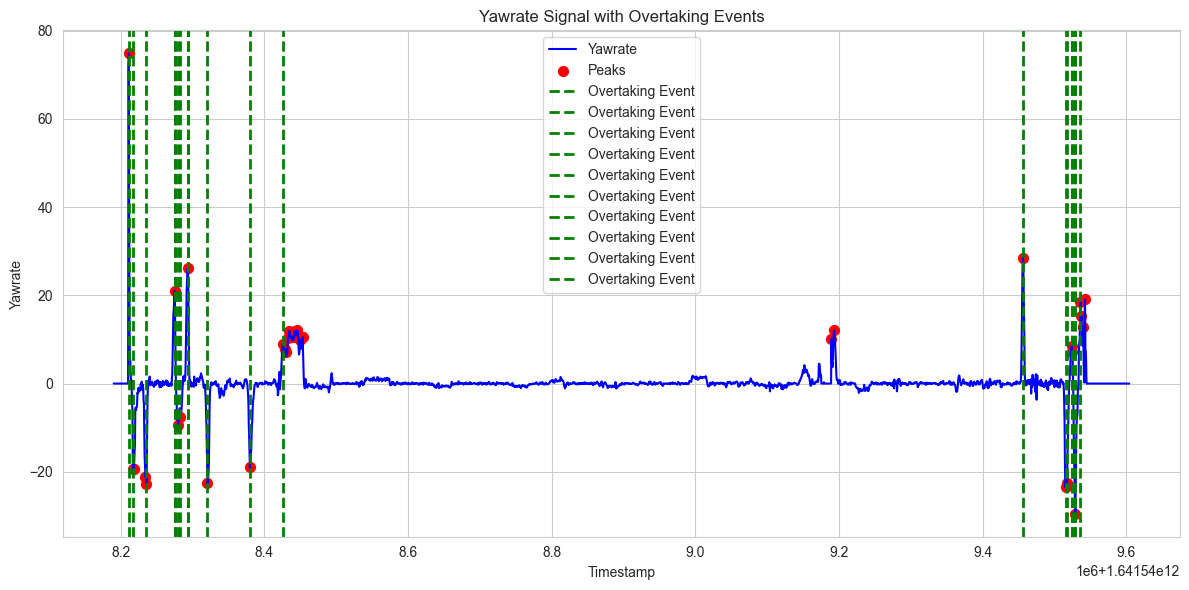

In [28]:

plt.figure(figsize=(12, 6))
plt.plot(new_df['timestamp'], new_df['yawrate'], color='blue', label='Yawrate')

plt.scatter(new_df['timestamp'].iloc[peaks], new_df['yawrate'].iloc[peaks], color='red', label='Peaks', s=50, marker='o')


for event in overtaking_events:
    plt.axvline(x=event[0], color='green', linestyle='--', linewidth=2, label='Overtaking Event')
    plt.axvline(x=event[1], color='green', linestyle='--', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Yawrate')
plt.title('Yawrate Signal with Overtaking Events')
plt.legend()
plt.grid(True)
plt.tight_layout()  
plt.show()


In [31]:
# # Function to determine if the driver has overtaken with a time threshold
# def has_overtaken_with_threshold(peak1, peak2, yawrate, timestamp):
#     time_diff = timestamp.iloc[peak2] - timestamp.iloc[peak1]
#     # Check if yawrate transitions from positive to 0 to negative and back to 0 and positive within the time threshold
#     if (yawrate.iloc[peak1] > 0 and yawrate.iloc[peak1+1:peak2].min() <= 0 and yawrate.iloc[peak2] < 0 
#         and yawrate.iloc[peak2+1:].max() >= 0 and time_diff <= 10) or \
#        (yawrate.iloc[peak1] < 0 and yawrate.iloc[peak1+1:peak2].max() >= 0 and yawrate.iloc[peak2] > 0 
#         and yawrate.iloc[peak2+1:].min() <= 0 and time_diff <= 10):
#         return True
#     else:
#         return False

# # Determine overtaking events with time threshold
# overtaking_events_with_threshold = []
# for i in range(len(peaks) - 1):
#     peak1 = peaks[i]
#     peak2 = peaks[i + 1]
#     if has_overtaken_with_threshold(peak1, peak2, new_df['yawrate'], new_df['timestamp']):
#         overtaking_events_with_threshold.append((new_df['timestamp'].iloc[peak1], new_df['timestamp'].iloc[peak2]))

# # Output overtaking events with time threshold
# print("Overtaking events with time threshold:")
# for event in overtaking_events_with_threshold:
#     print("Driver overtakes at {} and {}.".format(event[0], event[1]))


In [32]:
from datetime import datetime

# Function to convert timestamp to datetime
def convert_to_datetime(timestamp):
    return datetime.utcfromtimestamp(timestamp / 1000)  # Assuming the timestamp is in milliseconds

# Function to determine if the driver has overtaken with a time threshold
def has_overtaken_with_threshold(peak1, peak2, yawrate, timestamp):
    time_diff_seconds = (convert_to_datetime(timestamp.iloc[peak2]) - convert_to_datetime(timestamp.iloc[peak1])).total_seconds()
    # Check if yawrate transitions and time difference meet the specified conditions within the threshold
    if (yawrate.iloc[peak1] > 0 and yawrate.iloc[peak1+1:peak2].min() <= 0 and yawrate.iloc[peak2] < 0 
        and yawrate.iloc[peak2+1:].max() >= 0 and time_diff_seconds <= 10) or \
       (yawrate.iloc[peak1] < 0 and yawrate.iloc[peak1+1:peak2].max() >= 0 and yawrate.iloc[peak2] > 0 
        and yawrate.iloc[peak2+1:].min() <= 0 and time_diff_seconds <= 10):
        return True
    else:
        return False


# Determine overtaking events with time threshold
overtaking_events_with_threshold = []
for i in range(len(peaks) - 1):
    peak1 = peaks[i]
    peak2 = peaks[i + 1]
    if has_overtaken_with_threshold(peak1, peak2, new_df['yawrate'], new_df['timestamp']):
        timestamp1 = convert_to_datetime(new_df['timestamp'].iloc[peak1])
        timestamp2 = convert_to_datetime(new_df['timestamp'].iloc[peak2])
        time_diff_seconds = (timestamp2 - timestamp1).total_seconds()
        time_diff_minutes = time_diff_seconds / 60  # Convert seconds to minutes
        overtaking_events_with_threshold.append((timestamp1, timestamp2, time_diff_seconds, time_diff_minutes))

# Output overtaking events with time threshold
print("Overtaking events with time threshold:")
for event in overtaking_events_with_threshold:
    print("Driver overtakes at {} and {}. Time difference: {} seconds ({} minutes).".format(
        event[0], event[1], event[2], event[3]))



Overtaking events with time threshold:
Driver overtakes at 2022-01-07 09:36:51.162000 and 2022-01-07 09:36:57.162000. Time difference: 6.0 seconds (0.1 minutes).
Driver overtakes at 2022-01-07 09:37:55.162000 and 2022-01-07 09:37:59.662000. Time difference: 4.5 seconds (0.075 minutes).
Driver overtakes at 2022-01-07 09:58:37.462000 and 2022-01-07 09:58:43.962000. Time difference: 6.5 seconds (0.10833333333333334 minutes).
Driver overtakes at 2022-01-07 09:58:44.962000 and 2022-01-07 09:58:48.962000. Time difference: 4.0 seconds (0.06666666666666667 minutes).
Driver overtakes at 2022-01-07 09:58:48.962000 and 2022-01-07 09:58:55.962000. Time difference: 7.0 seconds (0.11666666666666667 minutes).


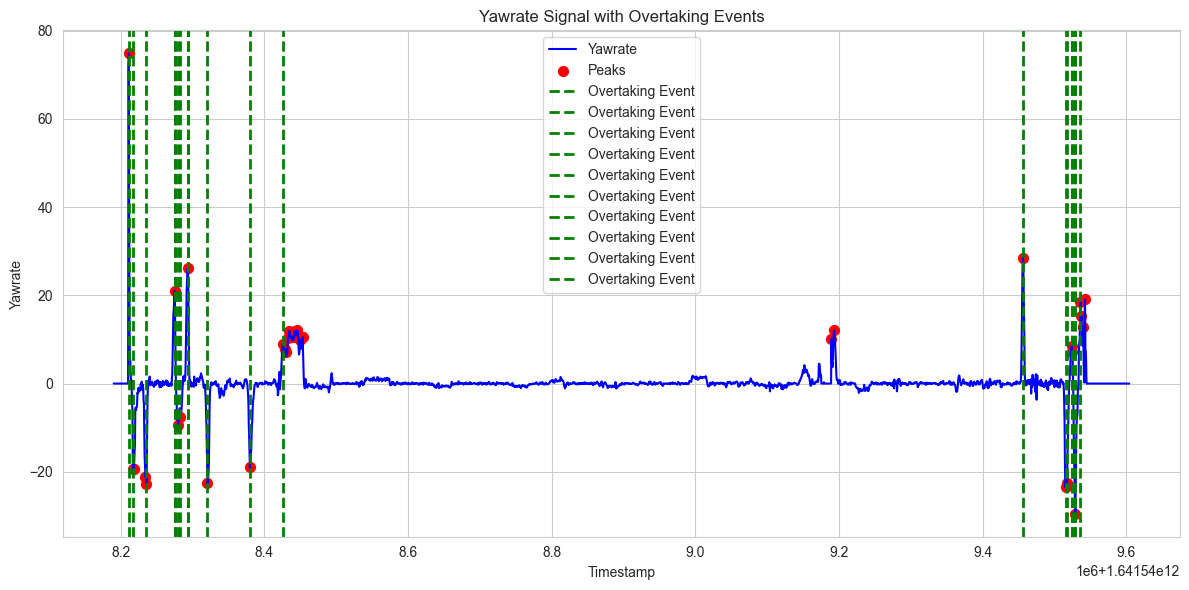

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(new_df['timestamp'], new_df['yawrate'], color='blue', label='Yawrate')

plt.scatter(new_df['timestamp'].iloc[peaks], new_df['yawrate'].iloc[peaks], color='red', label='Peaks', s=50, marker='o')


for event in overtaking_events:
    plt.axvline(x=event[0], color='green', linestyle='--', linewidth=2, label='Overtaking Event')
    plt.axvline(x=event[1], color='green', linestyle='--', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Yawrate')
plt.title('Yawrate Signal with Overtaking Events')
plt.legend()
plt.grid(True)
plt.tight_layout()  
plt.show()